# 실습 6:Numerical ODE
### 빅데이터수치해석 입문 및 실습
### 숙명여자대학교 기계시스템학부 심주용

### Reference:
 - Advanced Engineering Mathematics Book by Erwin Kreyszig
 - Robert Johansson [Numerical Python - A Practical Techniques Approach for Industry] Chapter 9


# Ordinary differential equations


In [2]:
import numpy as np

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import sympy
sympy.init_printing()

In [5]:
from scipy import integrate

## Symbolic ODE solving with SymPy

diff(x) - y라는 걸로 x를 미분해라 ode = dy/dx -x -y
y' = x + y 라는 미분방정식 풂.

In [4]:
x, y0 = sympy.symbols("x, y0")
y = sympy.Function("y")
ode = y(x).diff(x) - x - y(x)
ode

            d       
-x - y(x) + ──(y(x))
            dx      

In [7]:
ode_sol = sympy.dsolve(ode)
ode_sol

           x        
y(x) = C₁⋅ℯ  - x - 1

In [8]:
ode_sol = ode_sol.simplify()
ode_sol

           x        
y(x) = C₁⋅ℯ  - x - 1

In [9]:
ode_sol.lhs

y(x)

In [10]:
ode_sol.rhs

    x        
C₁⋅ℯ  - x - 1

In [11]:
ode_sol.free_symbols

{C₁, x}

### Function for applying initial conditions

In [12]:
ics = {y(0): y0}
ics

{y(0): y₀}

C1e^x-x-1에 x=0대입 -> C1-1

In [13]:
ode_sol.subs(x, 0)

y(0) = C₁ - 1

In [14]:
C_eq = ode_sol.subs(x, 0).subs(ics)
C_eq

y₀ = C₁ - 1

In [15]:
C_sol = sympy.solve(C_eq)
C_sol

[{C₁: y₀ + 1}]

In [16]:
ode_sol

           x        
y(x) = C₁⋅ℯ  - x - 1

In [17]:
C_sol[0]

{C₁: y₀ + 1}

In [18]:
ode_sol.subs(C_sol[0])

                      x    
y(x) = -x + (y₀ + 1)⋅ℯ  - 1

In [19]:
ode_sol_y0 = ode_sol.subs(C_sol[0])
ode_sol_y0_1 = ode_sol_y0.rhs.subs({y0: 1})
ode_sol_y0_1

        x    
-x + 2⋅ℯ  - 1

In [20]:
ode_sol

           x        
y(x) = C₁⋅ℯ  - x - 1

In [21]:
C_sol[0]

{C₁: y₀ + 1}

In [22]:
ode_sol_y0 = ode_sol.subs(C_sol[0])
ode_sol_y0

                      x    
y(x) = -x + (y₀ + 1)⋅ℯ  - 1

In [23]:
ode_sol_y0.free_symbols

{x, y₀}

In [24]:
y_x = sympy.lambdify((x, y0), ode_sol_y0.rhs, 'numpy')
y_x

<function _lambdifygenerated(x, y0)>

In [25]:
y_x(1,1)

3.43656365691809

In [26]:
x_np = np.linspace(0, 4, 10)
x_np

array([0.        , 0.44444444, 0.88888889, 1.33333333, 1.77777778,
       2.22222222, 2.66666667, 3.11111111, 3.55555556, 4.        ])

In [27]:
ode_sol_y0.rhs

               x    
-x + (y₀ + 1)⋅ℯ  - 1

In [28]:
y_x(x_np,1)

array([  1.        ,   1.67480255,   2.97596202,   5.25400246,
         9.0556094 ,  15.23340648,  25.11716552,  40.78082992,
        65.45897054, 104.19630007])

In [29]:
'%d' % 1

'1'

1
2
3


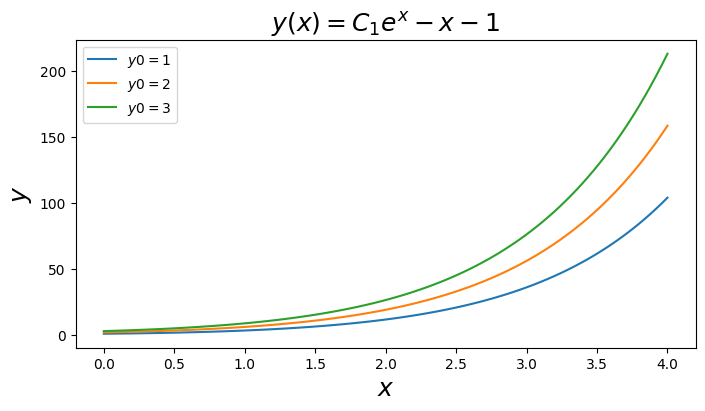

In [30]:
fig, ax = plt.subplots(figsize=(8, 4))

x_np = np.linspace(0, 4, 100)
y0_np = [1,2,3]

for k in [1, 2, 3]:
    print(k)
    ax.plot(x_np, y_x(x_np, k), label=r"$y0=%d$" % k)

ax.set_title(r"$%s$" % sympy.latex(ode_sol), fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()

## Direction Fields

In [31]:
def  plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):

    f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')

    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)

    if ax is None:
        _, ax = plt.subplots(figsize=(6, 6))

    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]

    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                    [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
    ax.axis('tight')

    ax.set_title(r"$%s$" %
                 (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
                 fontsize=18)

    return ax

In [ ]:
x = sympy.symbols("x")

In [ ]:
y = sympy.Function("y")

<Axes: title={'center': '$\\frac{d}{d x} y{\\left(x \\right)} = x - y{\\left(x \\right)}$'}>

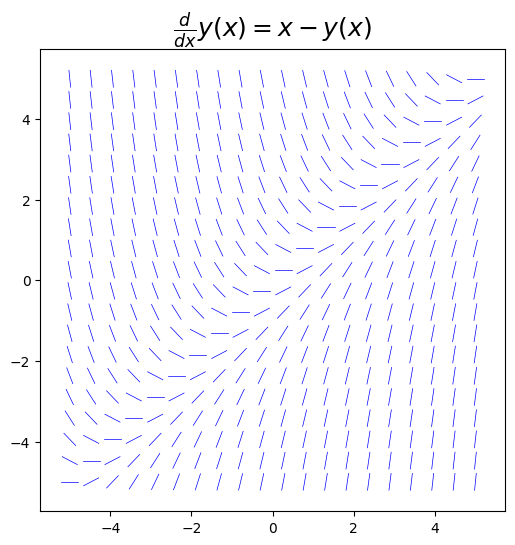

In [40]:
plot_direction_field(x, y(x), x - y(x))

# fig.savefig('field.pdf')

## Solutions to ODEs

In [32]:
x = sympy.symbols("x")

In [33]:
y = sympy.Function("y")

In [34]:
f = x + y(x)
# f = y(x)**2 + x

In [35]:
sympy.Eq(y(x).diff(x), f)

d                  
──(y(x)) = x + y(x)
dx                 

In [38]:
ode_sol = sympy.dsolve(y(x).diff(x) - f)
ode_sol = ode_sol.simplify()
ode_sol

           x        
y(x) = C₁⋅ℯ  - x - 1

In [37]:
ics = {y(0): 0}
ode_sol = sympy.dsolve(y(x).diff(x) - f,ics = ics)
ode_sol = ode_sol.simplify()
ode_sol

             x    
y(x) = -x + ℯ  - 1

TypeError: ignored

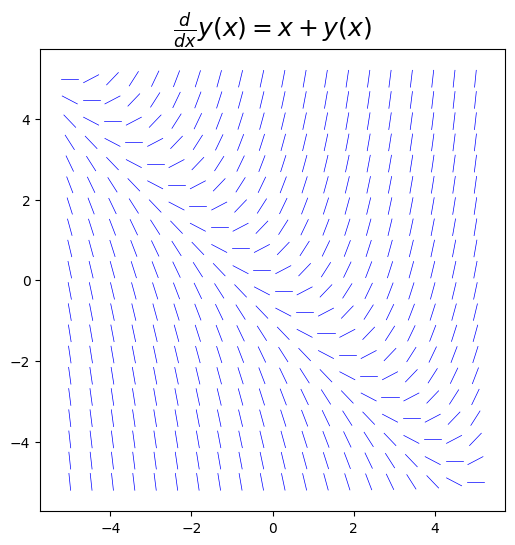

In [41]:
plot_direction_field(x, y(x), f)
x_vec = np.linspace(-3, 5, 100)
plt.plot(x_vec, sympy.lambdify(x, ode_sol.rhs)(x_vec), 'r', lw=2)
plt.ylim(-5, 5)

## Visualize scalar field/ vector fields
- Understanding Green Theorem/Stoke’s Theorem
- Understanding Divergence Theorem in 2D and 3D

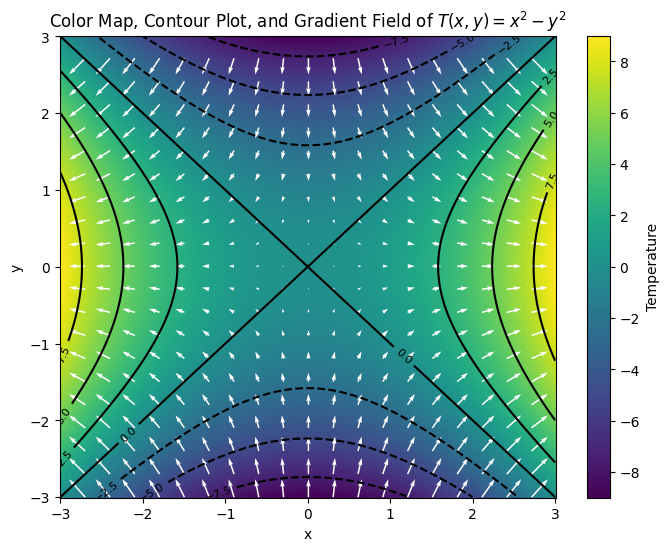

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define the temperature function T(x, y) and its gradient
def T(x, y):
    return x**2 - y**2

def grad_T(x, y):
    return 2*x, -2*y

# Create a grid for the color map, contour plot, and vector field
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = T(X, Y)

# Compute the gradient
U, V = grad_T(X, Y)

# Plotting
plt.figure(figsize=(8, 6))

# Color map
plt.pcolormesh(X, Y, Z, cmap='viridis', shading='auto')
plt.colorbar(label='Temperature')

# Contour plot
contour = plt.contour(X, Y, Z, colors='black')
plt.clabel(contour, inline=True, fontsize=8)

# Vector field (gradient)
plt.quiver(X[::20, ::20], Y[::20, ::20], U[::20, ::20], V[::20, ::20], color='white')

plt.title('Color Map, Contour Plot, and Gradient Field of $T(x, y) = x^2 - y^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


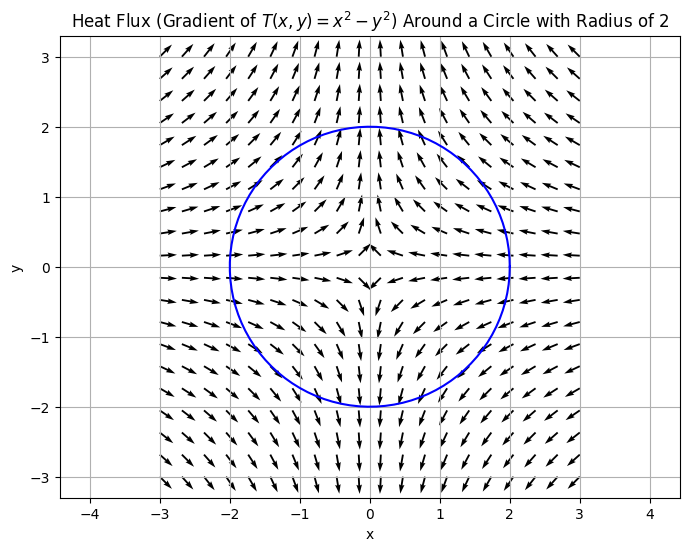

In [43]:
# Define the circle parameters
radius = 2
theta = np.linspace(0, 2*np.pi, 100)

# Circle coordinates
x_circle = radius * np.cos(theta)
y_circle = radius * np.sin(theta)

# Define the temperature function
def temperature(x, y):
    return x**2 - y**2

# Compute the gradient of the temperature function
def grad_temperature(x, y):
    return -2*x, +2*y

# Create a grid for the vector field
x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x, y)

# Compute the gradient vectors
U, V = grad_temperature(X, Y)

# Normalize the vectors for uniform arrow size
magnitude = np.sqrt(U**2 + V**2)
U_normalized = U / magnitude
V_normalized = V / magnitude

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_circle, y_circle, 'b-')  # circle plot
plt.quiver(X, Y, U_normalized, V_normalized)  # vector field plot

plt.title('Heat Flux (Gradient of $T(x, y) = x^2 - y^2$) Around a Circle with Radius of 2')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('equal')
plt.show()


# Numerical ODE

Solve ODE $y' = y+x, y(0)=0$ for $x=0,...,1.0$ with step $h =0.2$

## Euler Method

0.0 0
0.2 0.0
0.4 0.04
0.6 0.128
0.8 0.2736
1.0 0.48832
1.2 0.78598
1.4 1.18318
1.6 1.69982
1.8 2.35978
2.0 3.19174


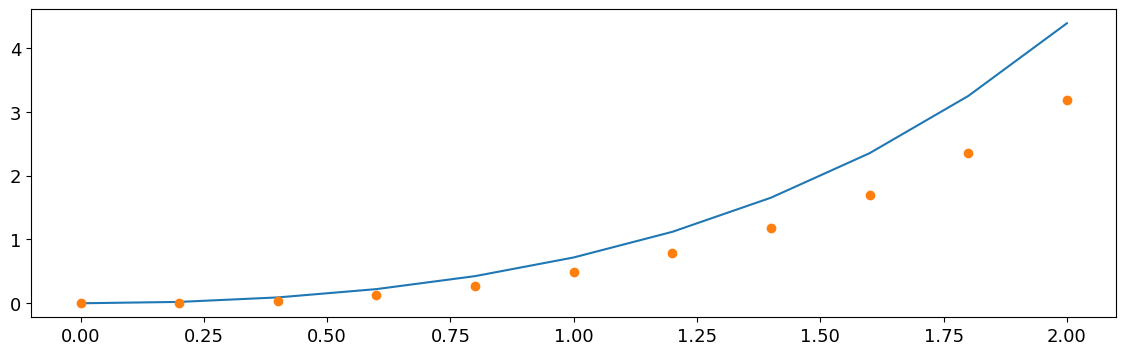

In [50]:
def func(x,y):
    return x + y
# y' = f(x,y) = x + y => y' - (x + y) = 0

h = 0.2
xs = []
ys = []
y_num = []

yi = 0

for i in range(11):
    x = np.round(i*h,2)
    y = np.round(-x + np.exp(x) -1, 5)
    yi1 = np.round(yi + h*func(x,yi),5)

    xs.append(x)
    ys.append(y)

    y_num.append(yi)
    print(x, yi)

    yi = yi1

plt.plot(xs, ys)
plt.plot(xs,y_num,'o')

## Runge-Kutta

![image.png](attachment:image.png)

0.0 0
0.2 0.0214
0.4 0.09182
0.6 0.22211
0.8 0.42553
1.0 0.71826
1.2 1.12009
1.4 1.65516
1.6 2.35298
1.8 3.24958
2.0 4.38897


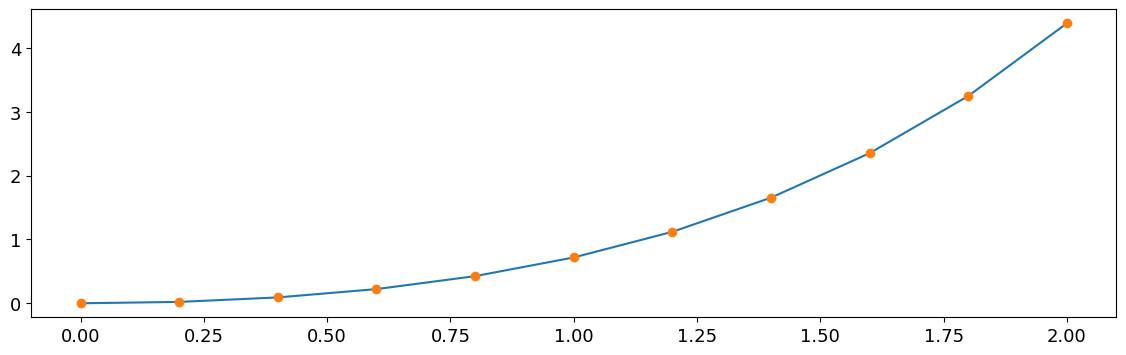

In [51]:
def func(x,y):
    return x + y

h = 0.2
xs = []
ys = []
y_num = []

yi = 0
yi1
for i in range(11):
    x = np.round(i*h,2)
    y = np.round(-x + np.exp(x) -1, 5)
    k1 = func(x,yi)
    k2 = func(x+h/2,y+h/2*k1)
    k3 = func(x+h/2,y+h/2*k2)
    k4 = func(x+h,y+h*k3)

    yi1 = np.round(yi + h*(k1+2*k2+2*k3+k4)/6,5)

    xs.append(x)
    ys.append(y)

    y_num.append(yi)
    print(x, yi)

    yi = yi1

plt.plot(xs, ys)
plt.plot(xs,y_num,'o')

## 2021 기말고사 기출 문제 1. Numerical Ordinary Differential Equation (20점)
다음 그림과 같이 Mass, Spring, Damper 시스템의 운동 방정식을 아래 식 (1)과 같이 나타낼 수 있다. 이때 물체의 질량 m = 1 kg, 감쇄계수 c = 10, 스프링계수 k = 100으로 가정한다.

 ![image.png](attachment:image.png)

식 (1):  $m\frac{d^2y}{dt^2}+c\frac{dy}{dt}+ky=0,y\left(0\right)=3,{\ y}^\prime\left(0\right)=0$
	이 물체를 오른쪽으로 3미터 당겼다가 놓았을 때 시간에 따른 물체의 궤적을 Euler 방법과 4차 Runge-Kutta 방법으로 미분방정식 풀어서 1.5 초까지의 궤적 y(t)를 그래프로 그려라. 이때, 간격 h = 0.02 초로 정의한다.


y'' + 10y'+ 100y =0

### 문제 1-(1)
이 물체를 오른쪽으로 3미터 당겼다가 놓았을 때 시간에 따른 물체의 궤적을 Euler 방법과 4차 Runge-Kutta 방법으로 미분방정식 풀어서 1.5 초까지의 궤적 y(t)를 그래프로 그려라. 이때, 간격 h = 0.02 초로 정의한다.


y(x=0)=3, y'(x=0)=0
y = y1, y1' = y2 = f1(x1, y1, y2), y1(0)=3
y'=y2, y2'=-10y2-100y1=f2(x, y1, y2),y2(0)=0

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy
# sympy.init_printing()

plt.rcParams['figure.figsize'] = [14, 4]
plt.rcParams.update({'font.size': 13})

In [45]:


t = sympy.symbols('t')
y = sympy.Function('y')

f = y(t).diff(t, 2) + 10*y(t).diff(t) + 100*y(t)
ics = {y(0) : 3, y(t).diff(t).subs(t,0) : 0}

ode_sol = sympy.dsolve(f, ics = ics)
ode_sol = ode_sol.simplify()
ode_sol

             -5⋅t    ⎛         π⎞
y(t) = 2⋅√3⋅ℯ    ⋅sin⎜5⋅√3⋅t + ─⎟
                     ⎝         3⎠

In [46]:
t = sympy.symbols('t')
y1 = sympy.Function('y1')
y2 = sympy.Function('y2')  # y2 = y1' = y'

deq_y1 = sympy.Eq(y1(t).diff(t), y2(t))
deq_y2 = sympy.Eq(y2(t).diff(t), 10*y2(t) + 100*y1(t))

deq_y1, deq_y2

⎛d                  d                               ⎞
⎜──(y₁(t)) = y₂(t), ──(y₂(t)) = 100⋅y₁(t) + 10⋅y₂(t)⎟
⎝dt                 dt                              ⎠

In [47]:
def func_y1(y2) :
    return y2

def func_y2(y2, y1) :
    return - 10*y2 - 100*y1

ti = 0
y1_i = 3
y2_i = 0

ts = []
ys_E = []

h = 0.02
N = 75
for i in range(N+1) :
    y1_i1 = y1_i + h*func_y1(y2_i)
    y2_i1 = y2_i + h*func_y2(y2_i, y1_i)

    ts.append(ti)
    ys_E.append(y1_i)

    ti += h
    y1_i = y1_i1
    y2_i = y2_i1

ti = 0
y1_i = 3
y2_i = 0

ts = []
ys_R = []

for i in range(N+1) :
    k1_1 = func_y1(y2_i)
    k2_1 = func_y2(y2_i, y1_i)

    k1_2 = func_y1(y2_i) + h*k2_1/2
    k2_2 = func_y2(y2_i+h/2*k2_1, y1_i+h/2*k1_1)

    k1_3 = func_y1(y2_i) + h*k2_2/2
    k2_3 = func_y2(y2_i+h/2*k2_2, y1_i+h/2*k1_2)

    k1_4 = func_y1(y2_i) + h*k2_3/2
    k2_4 = func_y2(y2_i+h/2*k2_3, y1_i+h/2*k1_3)

    y1_i1 = y1_i + h/6*(k1_1+2*k1_2+2*k1_3+k1_4)
    y2_i1 = y2_i + h/6*(k2_1+2*k2_2+2*k2_3+k2_4)

    ts.append(ti)
    ys_R.append(y1_i)

    ti += h
    y1_i = y1_i1
    y2_i = y2_i1

t_vec = np.array(ts)
y_func = sympy.lambdify((t), ode_sol.rhs, "numpy")
# y = 2*sqrt(3)*exp(-5*ti)*sin(5*sqrt(3)*ti+pi/3)
y_vec_E = y_func(t_vec)
y_vec_R = y_func(t_vec)


### 답 1-(1): 물체 궤적의 Euler해와 Runge-Kutta해 그래프


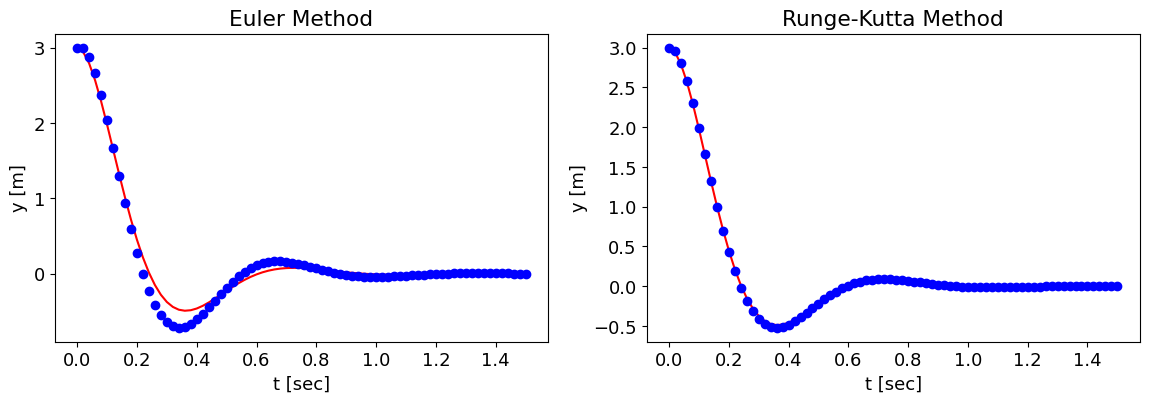

In [48]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(t_vec, y_vec_E, 'r')
ax1.set_xlabel('t [sec]')
ax1.set_ylabel('y [m]')
ax1.plot(ts, ys_E, 'o', color='b')
ax1.title.set_text('Euler Method')

ax2 = fig.add_subplot(122)
ax2.plot(t_vec, y_vec_R, 'r')
ax2.plot(ts, ys_R, 'o', color='b')
ax2.set_xlabel('t [sec]')
ax2.set_ylabel('y [m]')
ax2.title.set_text('Runge-Kutta Method')

### 문제 1-(2)
이때, 0.5초에서 Euler 방법으로 예측한 물체의 위치가 실제 엄밀해로 구한 물체의 위치와의 오차를 계산하여라.

### 답 1-(2): 0.5초에서 Euler 방법 오차 0.1819

In [ ]:
ts = np.array(ts).round(5)
ys_E = np.array(ys_E)
ys_E[np.where(ts==0.5)]


array([-0.18192122])

## 문제 1-(3)
위 (1)의 0.5초에서 Runge-Kutta 방법으로 예측한 물체의 위치가 실제 엄밀해로 구한 물체의 위치와의 오차를 계산하세요.

### 답 1-(3): 0.5초에서  Runge-Kutta 방법 오차 0.2216

In [ ]:
ys_R = np.array(ys_R)
ys_R[np.where(ts==0.5)]

array([-0.22161322])

## 문제 1-(4)
위에서 감쇄계수 감소 혹은 스프링 계수 증가에 따라 물체의 궤적이 변화를 서술하세요.

### 답 1-(4): 감쇄계수가 감소하거나 스프링 계수가 증가할 수록 t가 증가함에 따라 진동의 진폭이 점점 커지면서 물체는 비감쇠 강제진동을 하게 된다.

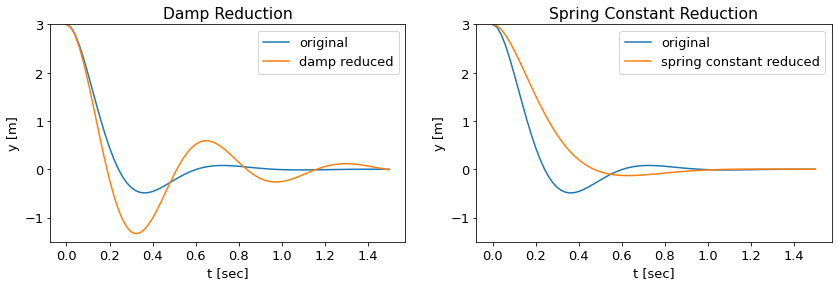

In [ ]:
# 감쇄계수 감소
f = y(t).diff(t, 2) + 5*y(t).diff(t) + 100*y(t)
ics = {y(0) : 3, y(t).diff(t).subs(t,0) : 0}

ode_sol = sympy.dsolve(f, ics = ics)
ode_sol = ode_sol.simplify()
t_vec = np.array(ts)
y_func = sympy.lambdify((t), ode_sol.rhs, "numpy")
y_damp = y_func(t_vec)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(t_vec, y_vec_E)
ax1.plot(t_vec, y_damp)
ax1.legend(['original', 'damp reduced'])
ax1.set_xlabel('t [sec]')
ax1.set_ylabel('y [m]')
ax1.title.set_text('Damp Reduction')
ax1.set_ylim([-1.5, 3])
f = y(t).diff(t, 2) + 10*y(t).diff(t) + 50*y(t)
ics = {y(0) : 3, y(t).diff(t).subs(t,0) : 0}

ode_sol = sympy.dsolve(f, ics = ics)
ode_sol = ode_sol.simplify()
t_vec = np.array(ts)
y_func = sympy.lambdify((t), ode_sol.rhs, "numpy")
y_spring = y_func(t_vec)

ax2 = fig.add_subplot(122)
ax2.plot(t_vec, y_vec_E)
ax2.plot(t_vec, y_spring)
ax2.set_ylim([-1.5, 3])
ax2.legend(['original', 'spring constant reduced'])
ax2.set_xlabel('t [sec]')
ax2.set_ylabel('y [m]')
ax2.title.set_text('Spring Constant Reduction')

## 문제 1-(5)
(5)	위에서 감쇄계수 감소 혹은 스프링 계수 증가에 따른 수치해석 해의 변화를 서술하세요.

### 답 1-(5): 1-(5) 답 : 감쇄계수가 감소하거나 스프링 계수가 증가할 수록 물체는 비감쇠 강제진동을 하면서 y방향의 진폭이 무한대로 접근하게 된다. 따라서 감쇄계수의 영향을 무시할 수 있을 정도가 되면 C=0으로 두고 풀 수 있으며 더욱 간단화된 수치해석 식을 얻을 수 있다.